# Get them all with MixedRoute

Creates 2 transmon pockets facing each other.

Anchors are user-specified points through which the Routing must pass.

Between anchors you can specify different connection algorythms.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from qiskit_metal import designs
from qiskit_metal import MetalGUI, Dict

design = designs.DesignPlanar()
gui = MetalGUI(design)

In [3]:
# enable rebuild of the same component
design.overwrite_enabled = True
design.delete_all_components()

In [4]:
design.delete_all_components()  #needed only for rebuilds. will get a warning
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

optionsQ = dict(
    pad_width = '425 um', 
    pocket_height = '650um',
    connection_pads=dict(  # pin connectors
        a = dict(loc_W=+1,loc_H=+1), 
        b = dict(loc_W=-1,loc_H=+1, pad_height='30um'),
        c = dict(loc_W=+1,loc_H=-1, pad_width='200um'),
        d = dict(loc_W=-1,loc_H=-1, pad_height='50um')
    )
)

q0 = TransmonPocket(design, 'Q0', options = dict(pos_x='-5.0mm', pos_y='0.0mm', **optionsQ))
q1 = TransmonPocket(design, 'Q1', options = dict(pos_x='5.0mm', pos_y='0.0mm', **optionsQ))

gui.rebuild()
gui.autoscale()

#### Single CPW using one meander and 3 simple segments

In [5]:
from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
import numpy as np
from collections import OrderedDict
ops=dict(fillet='90um')

In [6]:
anchors = OrderedDict()
anchors[0] = np.array([-3., 1.])
anchors[1] = np.array([0, 2])
anchors[2] = np.array([3., 1])
anchors[3] = np.array([4., .5])

between_anchors = OrderedDict() # S, M, PF
between_anchors[0] = "S"
between_anchors[1] = "M"
between_anchors[2] = "S"
between_anchors[3] = "M"
between_anchors[4] = "S"

jogsS = OrderedDict()
jogsS[0] = ["R", '200um']
jogsS[1] = ["R", '200um']
jogsS[2] = ["L", '200um']
jogsS[3] = ["L", '500um']
jogsS[4] = ["R", '200um']

jogsE = OrderedDict()
jogsE[0] = ["L", '200um']
jogsE[1] = ["L", '200um']
jogsE[2] = ["R", '200um']
jogsE[3] = ["R", '500um']
jogsE[4] = ["L", '200um']


optionsR = {'pin_inputs': {
              'start_pin': {'component': 'Q0', 'pin': 'b'}, 
              'end_pin': {'component': 'Q1', 'pin': 'a'}
            },
            'total_length': '32mm',
            'chip': 'main',
            'layer': '1',
            'trace_width': 'cpw_width',
            'step_size': '0.25mm',
            'anchors': anchors,
            'between_anchors': between_anchors,
            'advanced': {'avoid_collision': 'true'},
            'meander': {
              'spacing': '200um',
              'asymmetry': '0um'
            },
            'snap': 'true',
            'lead': {
              'start_straight': '0.3mm',
              'end_straight': '0.3mm',
              'start_jogged_extension': jogsS,
              'end_jogged_extension': jogsE
            },
            **ops
          }

qa = RouteMixed(design, 'line', optionsR)

gui.rebuild()
gui.autoscale()

#### Single CPW using the pathfinder segments

In [7]:
anchors = OrderedDict()
anchors[0] = np.array([-3., -1.])
anchors[1] = np.array([0.2, -2])
anchors[2] = np.array([3., -1.7])

between_anchors = OrderedDict() # S, M, PF
between_anchors[0] = "S"
between_anchors[1] = "S"
between_anchors[2] = "PF"
between_anchors[3] = "S"

jogsS = OrderedDict()
jogsS[0] = ["L", '200um']
jogsS[1] = ["L", '200um']
jogsS[2] = ["R", '200um']
jogsS[3] = ["R", '500um']
jogsS[4] = ["L", '200um']

jogsE = OrderedDict()
jogsE[0] = ["R", '200um']
jogsE[1] = ["R", '200um']
jogsE[2] = ["L", '200um']
jogsE[3] = ["L", '500um']
jogsE[4] = ["R", '200um']


optionsR = {'pin_inputs': {
              'start_pin': {'component': 'Q0', 'pin': 'd'}, 
              'end_pin': {'component': 'Q1', 'pin': 'c'}
            },
            'total_length': '22mm',
            'chip': 'main',
            'layer': '1',
            'trace_width': 'cpw_width',
            'step_size': '0.25mm',
            'anchors': anchors,
            'between_anchors': between_anchors,
            'advanced': {'avoid_collision': 'true'},
            'meander': {
              'spacing': '200um',
              'asymmetry': '0um'
            },
            'snap': 'true',
            'lead': {
              'start_straight': '0.3mm',
              'end_straight': '0.3mm',
              'start_jogged_extension': jogsS,
              'end_jogged_extension': jogsE
            },
            **ops
          }

qb = RouteMixed(design, 'line2', optionsR)

gui.rebuild()
gui.autoscale()

In [8]:
# create an obstacle
TransmonPocket(design, options = dict(pos_x='1.0mm', pos_y='-2.0mm', **optionsQ))
TransmonPocket(design, options = dict(pos_x='1.0mm', pos_y='-1.0mm', **optionsQ))
TransmonPocket(design, options = dict(pos_x='-2.0mm', pos_y='-1.0mm', **optionsQ))

gui.rebuild()
gui.autoscale()

In [9]:
anchors = OrderedDict()
anchors[0] = np.array([0.,-1.5])

between_anchors = OrderedDict() # S, M, PF
between_anchors[0] = "S"
between_anchors[1] = "PF"

jogsS = OrderedDict()
jogsS[0] = ["R", '200um']
jogsS[1] = ["R", '200um']
jogsS[2] = ["L", '200um']
jogsS[3] = ["L", '500um']

jogsE = OrderedDict()
jogsE[0] = ["L", '200um']
jogsE[1] = ["L", '200um']
jogsE[2] = ["R", '200um']
jogsE[3] = ["R", '500um']

optionsR = {'pin_inputs': {
              'start_pin': {'component': 'Q0', 'pin': 'c'}, 
              'end_pin': {'component': 'Q1', 'pin': 'd'}
            },
            'total_length': '12mm',
            'chip': 'main',
            'layer': '1',
            'trace_width': 'cpw_width',
            'step_size': '0.25mm',
            'anchors': anchors,
            'between_anchors': between_anchors,
            'advanced': {'avoid_collision': 'true'},
            'meander': {
              'spacing': '200um',
              'asymmetry': '0um'
            },
            'snap': 'true',
            'lead': {
              'start_straight': '0.3mm',
              'end_straight': '0.3mm',
              'start_jogged_extension': jogsS,
              'end_jogged_extension': jogsE
            },
            **ops
          }

qc = RouteMixed(design, 'line3', optionsR)

gui.rebuild()
gui.autoscale()

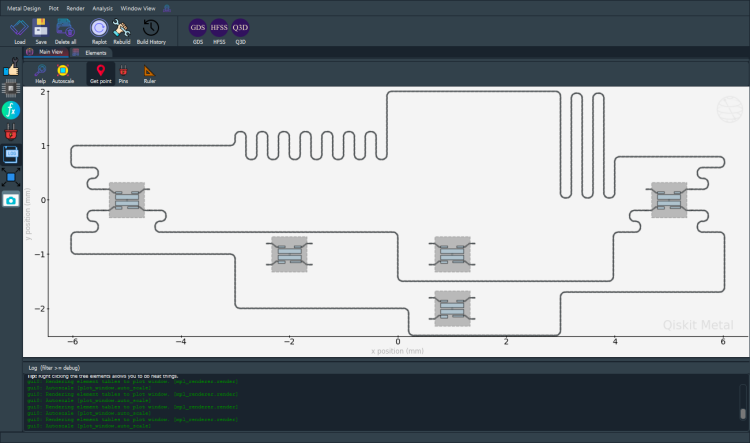

In [10]:
gui.screenshot()